# New Assignment 6

Perform the pair trading backtest in Python. The conditions will remain the same as the one you've done on excel:

Step 1 : Download EOD bhavcopies (1/1/2013 to 31/12/2013) from NSE (https://www1.nseindia.com/products/content/derivatives/equities/archieve_fo.htm) and extract and create two separate csv files for HDFC and HDFCBANK 
Step 2 :   Calculate the ratio between HDFCBANK and HDFC
Step 3 :   Calculate the 10 day mean of the ratio
Step 4 :   Calculate the 2 SD bollinger bands
Step 5 :   Generate Buy Sell Short Cover trade signals
Step 6 :   Populate tradelist for the system
Step 7 :   Compute gross p&l (INR and %), transaction costs, net p&l (INR and %)
Step 8 :   Calculate output statistics (XIRR, MDD)
Step 9 :   Generate portfolio equity curve
Step 10 :   Calculate monthly profit table

In [1]:
import urllib
import pandas as pd
import numpy as np
import datetime
import zipfile, os

In [2]:
#Inputs

DownloadStart = input('You would like to download bhavcopies from which date? (please input in dd/mm/yyyy format)\n')
DownloadStop = input('You would like to download bhavcopies till which date? (please input in dd/mm/yyyy format)\n')

You would like to download bhavcopies from which date? (please input in dd/mm/yyyy format)
01/01/2016
You would like to download bhavcopies till which date? (please input in dd/mm/yyyy format)
31/12/2016


In [3]:
#getting the list of dates

from datetime import datetime,timedelta 
StartDownload = datetime.strptime(DownloadStart,'%d/%m/%Y')
StopDownload = datetime.strptime(DownloadStop,'%d/%m/%Y')

DateIndex = pd.date_range(StartDownload,StopDownload-timedelta(days=0),freq='d')
print(DateIndex)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')


# if you have only one csv file in folder then this method and if you have 2 and have to unzip then you have to follow assignment 5 method.

In [4]:
import requests
from zipfile import ZipFile
import os.path

link = "https://www1.nseindia.com/content/historical/EQUITIES/2013/JAN/cm01JAN2013bhav.csv.zip"
link1 = "https://www1.nseindia.com/content/historical/EQUITIES/"
joiner = "/"
link2 = "cm"
link3 = "bhav.csv.zip"
path = r"C:\Users\admin\Desktop\Assignment6_Bhavcopies\\"
filenamehelp = "bhav.csv"

for i in range(0,len(DateIndex)):
    try:
        Year = DateIndex[i].strftime('%Y')
        Month = (DateIndex[i].strftime('%b')).upper()
        Day = DateIndex[i].strftime('%d')
        finallink = link1 + Year + joiner + Month + joiner + link2 + Day + Month + Year + link3
        filename = link2 + Day + Month + Year + filenamehelp
        completename = path + filename
        df = pd.read_csv(finallink)
        df.to_csv(completename + ".csv")       
    except:
        pass

In [5]:
#combining them all into 1 csv file
import glob
import os

files = os.path.join("C:\\Users\\admin\\Desktop\\Assignment6_Bhavcopies\\","*.csv")
files = glob.glob(files)
newdf = pd.concat(map(pd.read_csv,files),ignore_index=True)
display(newdf)
newdf.to_csv('data.csv')

,Unnamed: 0,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,Unnamed: 13
0,0,20MICRONS,EQ,27.95,29.15,27.50,28.50,28.50,28.15,32780,928645.65,01-APR-2016,209,INE144J01027,NaN
1,1,3IINFOTECH,EQ,4.20,4.55,4.10,4.40,4.45,4.15,1719404,7552327.65,01-APR-2016,779,INE748C01020,NaN
2,2,3MINDIA,EQ,10655.05,10880.00,10655.05,10826.05,10870.00,10724.95,100,1080720.35,01-APR-2016,49,INE470A01017,NaN
3,3,8KMILES,EQ,1998.25,2029.00,1951.00,2014.25,2025.00,1998.25,22146,44328051.80,01-APR-2016,2381,INE650K01013,NaN
4,4,A2ZINFRA,EQ,19.85,21.20,19.85,20.85,20.75,19.90,193654,4030127.55,01-APR-2016,915,INE619I01012,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409158,1627,ZODIACLOTH,EQ,211.55,212.25,211.50,211.65,212.25,219.85,173,36613.30,31-MAY-2016,5,INE206B01013,NaN
409159,1628,ZUARI,EQ,174.80,179.00,172.15,173.15,172.15,174.25,10029,1768727.85,31-MAY-2016,420,INE840M01016,NaN
409160,1629,ZUARIGLOB,EQ,97.05,97.95,95.00,97.00,97.00,97.95,6110,591531.70,31-MAY-2016,123,INE217A01012,NaN
409161,1630,ZYDUSWELL,EQ,787.50,793.75,760.00,772.65,772.25,787.40,5841,4499697.70,31-MAY-2016,772,INE768C01010,NaN


In [6]:
symbol1 = input('You want to perform pair trading between: (input symbol 1 name as per NSE format)\n')
symbol2 = input('You want to perform pair trading between: (input symbol 1 name as per NSE format)\n')

You want to perform pair trading between: (input symbol 1 name as per NSE format)
HDFCBANK
You want to perform pair trading between: (input symbol 1 name as per NSE format)
HDFC


In [7]:
#HDFCBank Data

StockA = newdf[(newdf['SYMBOL']==symbol1) & (newdf['SERIES']=='EQ')]
StockA.reset_index(inplace = True,drop = True)
display(StockA)

StockA.to_csv('StockA.csv')

,Unnamed: 0,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,Unnamed: 13
0,518,HDFCBANK,EQ,1068.80,1076.40,1056.80,1064.45,1065.05,1071.15,1289662,1.370767e+09,01-APR-2016,27189,INE040A01026,NaN
1,549,HDFCBANK,EQ,1249.00,1258.95,1227.65,1242.30,1244.90,1246.20,1390216,1.727991e+09,01-AUG-2016,25393,INE040A01026,NaN
2,541,HDFCBANK,EQ,1202.30,1207.90,1193.00,1197.25,1195.00,1199.60,1119246,1.344826e+09,01-DEC-2016,43860,INE040A01026,NaN
3,529,HDFCBANK,EQ,1058.00,1067.00,1053.70,1059.75,1062.90,1049.85,1152371,1.222522e+09,01-FEB-2016,27007,INE040A01026,NaN
4,525,HDFCBANK,EQ,1082.40,1090.25,1076.15,1088.75,1088.70,1082.15,798769,8.678170e+08,01-JAN-2016,11330,INE040A01026,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,536,HDFCBANK,EQ,1263.30,1263.30,1250.00,1253.30,1251.85,1259.05,191554,2.405552e+08,30-OCT-2016,5456,INE040A01026,NaN
243,551,HDFCBANK,EQ,1277.10,1281.00,1267.40,1272.85,1275.00,1277.50,1034607,1.318134e+09,30-SEP-2016,17526,INE040A01026,NaN
244,549,HDFCBANK,EQ,1269.00,1295.00,1265.50,1291.20,1291.00,1268.65,2790341,3.574262e+09,31-AUG-2016,51707,INE040A01026,NaN
245,522,HDFCBANK,EQ,1066.85,1078.90,1065.05,1071.15,1071.80,1064.95,5020098,5.386359e+09,31-MAR-2016,72675,INE040A01026,NaN


In [8]:
#HDFC  Data

StockB = newdf[(newdf['SYMBOL']==symbol2) & (newdf['SERIES']=='EQ')]
StockB.reset_index(inplace = True,drop = True)
display(StockB)

StockB.to_csv('StockB.csv')

,Unnamed: 0,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,Unnamed: 13
0,516,HDFC,EQ,1100.00,1117.80,1092.25,1113.40,1115.20,1105.60,3894156,4.295293e+09,01-APR-2016,136099,INE001A01036,NaN
1,547,HDFC,EQ,1385.00,1397.45,1368.00,1374.30,1376.55,1374.50,3040038,4.202252e+09,01-AUG-2016,85726,INE001A01036,NaN
2,540,HDFC,EQ,1268.40,1285.75,1259.20,1270.00,1267.20,1263.10,2474051,3.153933e+09,01-DEC-2016,134870,INE001A01036,NaN
3,528,HDFC,EQ,1182.40,1193.95,1170.60,1180.05,1178.15,1180.00,2136935,2.527339e+09,01-FEB-2016,100847,INE001A01036,NaN
4,523,HDFC,EQ,1261.00,1266.90,1250.65,1258.45,1257.80,1263.75,676161,8.508751e+08,01-JAN-2016,13230,INE001A01036,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,535,HDFC,EQ,1398.00,1398.00,1375.00,1377.50,1377.00,1391.70,110205,1.522000e+08,30-OCT-2016,3479,INE001A01036,NaN
243,549,HDFC,EQ,1396.90,1399.20,1381.80,1393.45,1394.95,1401.40,2719424,3.777802e+09,30-SEP-2016,67352,INE001A01036,NaN
244,547,HDFC,EQ,1390.10,1414.00,1390.00,1405.45,1409.85,1392.10,5712564,8.011950e+09,31-AUG-2016,140586,INE001A01036,NaN
245,521,HDFC,EQ,1111.00,1118.95,1098.00,1105.60,1107.00,1115.30,9556036,1.056822e+10,31-MAR-2016,175689,INE001A01036,NaN


In [9]:
finaldata = pd.DataFrame()
for i in range(len(StockA)):
    finaldata.loc[i,'Timestamp'] = StockA.loc[i,'TIMESTAMP']
    finaldata.loc[i,'StockA_Close'] = StockA.loc[i,'CLOSE']
    finaldata.loc[i,'StockB_Close'] = StockB.loc[i,'CLOSE']
    
finaldata['Date'] = pd.to_datetime(finaldata['Timestamp'])
finaldata.sort_values(by='Date',inplace=True)
finaldata.reset_index(inplace = True,drop = True)
display(finaldata)

,Timestamp,StockA_Close,StockB_Close,Date
0,01-JAN-2016,1088.75,1258.45,2016-01-01
1,04-JAN-2016,1070.50,1216.70,2016-01-04
2,05-JAN-2016,1062.40,1209.40,2016-01-05
3,06-JAN-2016,1067.10,1209.30,2016-01-06
4,07-JAN-2016,1056.20,1179.45,2016-01-07
...,...,...,...,...
242,26-DEC-2016,1175.00,1219.50,2016-12-26
243,27-DEC-2016,1185.20,1232.15,2016-12-27
244,28-DEC-2016,1186.75,1237.95,2016-12-28
245,29-DEC-2016,1205.20,1257.20,2016-12-29


In [10]:
finaldata['Ratio'] = finaldata['StockA_Close']/finaldata['StockB_Close']
finaldata['10DayMA'] = finaldata['Ratio'].rolling(10).mean()
finaldata['SD'] = finaldata['Ratio'].rolling(10).std()
finaldata['UpperBand'] = finaldata['10DayMA'] + (1*finaldata['SD'])
finaldata['LowerBand'] = finaldata['10DayMA'] - (1*finaldata['SD'])


display(finaldata)

,Timestamp,StockA_Close,StockB_Close,Date,Ratio,10DayMA,SD,UpperBand,LowerBand
0,01-JAN-2016,1088.75,1258.45,2016-01-01,0.865152,NaN,NaN,NaN,NaN
1,04-JAN-2016,1070.50,1216.70,2016-01-04,0.879839,NaN,NaN,NaN,NaN
2,05-JAN-2016,1062.40,1209.40,2016-01-05,0.878452,NaN,NaN,NaN,NaN
3,06-JAN-2016,1067.10,1209.30,2016-01-06,0.882411,NaN,NaN,NaN,NaN
4,07-JAN-2016,1056.20,1179.45,2016-01-07,0.895502,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
242,26-DEC-2016,1175.00,1219.50,2016-12-26,0.963510,0.947222,0.015977,0.963199,0.931245
243,27-DEC-2016,1185.20,1232.15,2016-12-27,0.961896,0.950631,0.014981,0.965611,0.935650
244,28-DEC-2016,1186.75,1237.95,2016-12-28,0.958641,0.953668,0.012874,0.966542,0.940794
245,29-DEC-2016,1205.20,1257.20,2016-12-29,0.958638,0.956091,0.010987,0.967079,0.945104


In [11]:
#short means short stock A and buy stock B
#buy means buy stock A and short stock B
countshort = 0
countcover = 0
countbuy = 0
countsell = 0

for i in range (0,len(finaldata)):
    
    if (countshort > countcover):
        if (finaldata.loc[i,'Ratio'] < finaldata.loc[i,'10DayMA']):
            finaldata.loc[i,'Cover'] = 1
            countcover += 1
    if (countbuy>countsell):
        if (finaldata.loc[i,'Ratio'] > finaldata.loc[i,'10DayMA']):
            finaldata.loc[i,'Sell'] = 1
            countsell += 1
    if ((finaldata.loc[i,'Ratio'] < finaldata.loc[i,'LowerBand']) and (countshort == countcover) and (countbuy == countsell)):
        finaldata.loc[i,'Buy'] = 1
        countbuy+=1
    if ((finaldata.loc[i,'Ratio'] > finaldata.loc[i,'UpperBand']) and (countbuy == countsell) and (countshort == countcover)):
        finaldata.loc[i,'Short'] = 1
        countshort+=1
    
#display(finaldata)
#finaldata.to_csv('test2.csv')

In [13]:
#Getting the transaction prices
for i in range (0,len(finaldata)):
    if ((finaldata.loc[i,'Cover'] == 1) or (finaldata.loc[i,'Sell'] == 1) or (finaldata.loc[i,'Buy'] == 1) or (finaldata.loc[i,'Short'] == 1)):
        finaldata.loc[i,'StockA_TP'] = finaldata.loc[i,'StockA_Close']
        finaldata.loc[i,'StockB_TP'] = finaldata.loc[i,'StockB_Close']
display(finaldata)    

,Timestamp,StockA_Close,StockB_Close,Date,Ratio,10DayMA,SD,UpperBand,LowerBand,Buy,Sell,Short,Cover,StockA_TP,StockB_TP
0,01-JAN-2016,1088.75,1258.45,2016-01-01,0.865152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04-JAN-2016,1070.50,1216.70,2016-01-04,0.879839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05-JAN-2016,1062.40,1209.40,2016-01-05,0.878452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-JAN-2016,1067.10,1209.30,2016-01-06,0.882411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,07-JAN-2016,1056.20,1179.45,2016-01-07,0.895502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26-DEC-2016,1175.00,1219.50,2016-12-26,0.963510,0.947222,0.015977,0.963199,0.931245,NaN,NaN,NaN,NaN,NaN,NaN
243,27-DEC-2016,1185.20,1232.15,2016-12-27,0.961896,0.950631,0.014981,0.965611,0.935650,NaN,NaN,NaN,NaN,NaN,NaN
244,28-DEC-2016,1186.75,1237.95,2016-12-28,0.958641,0.953668,0.012874,0.966542,0.940794,NaN,NaN,NaN,NaN,NaN,NaN
245,29-DEC-2016,1205.20,1257.20,2016-12-29,0.958638,0.956091,0.010987,0.967079,0.945104,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
openinglist = finaldata[(finaldata['Buy']==1) | (finaldata['Short']==1)]
openinglist.reset_index(inplace = True,drop = True)
display(openinglist)

,Timestamp,StockA_Close,StockB_Close,Date,Ratio,10DayMA,SD,UpperBand,LowerBand,Buy,Sell,Short,Cover,StockA_TP,StockB_TP
0,20-JAN-2016,1018.30,1136.65,2016-01-20,0.895878,0.904082,0.005558,0.909640,0.898524,1.0,NaN,NaN,NaN,1018.30,1136.65
1,09-FEB-2016,1026.05,1159.90,2016-02-09,0.884602,0.892869,0.005538,0.898407,0.887332,1.0,NaN,NaN,NaN,1026.05,1159.90
2,10-FEB-2016,1012.95,1116.55,2016-02-10,0.907214,0.895070,0.006452,0.901522,0.888618,NaN,1.0,1.0,NaN,1012.95,1116.55
3,18-FEB-2016,989.45,1069.10,2016-02-18,0.925498,0.902050,0.012166,0.914217,0.889884,NaN,NaN,1.0,NaN,989.45,1069.10
4,03-MAR-2016,1015.85,1124.15,2016-03-03,0.903661,0.919131,0.010819,0.929950,0.908312,1.0,NaN,NaN,NaN,1015.85,1124.15
5,15-MAR-2016,1026.70,1111.35,2016-03-15,0.923831,0.901913,0.015247,0.917160,0.886666,NaN,1.0,1.0,NaN,1026.70,1111.35
6,29-MAR-2016,1053.80,1125.75,2016-03-29,0.936087,0.912072,0.013480,0.925552,0.898592,NaN,NaN,1.0,NaN,1053.80,1125.75
7,21-APR-2016,1091.15,1150.10,2016-04-21,0.948744,0.969767,0.013507,0.983274,0.956260,1.0,NaN,NaN,NaN,1091.15,1150.10
8,26-APR-2016,1113.85,1127.30,2016-04-26,0.988069,0.972657,0.013618,0.986275,0.959039,NaN,NaN,1.0,NaN,1113.85,1127.30
9,05-MAY-2016,1132.30,1162.65,2016-05-05,0.973896,1.001695,0.024655,1.026350,0.977040,1.0,NaN,NaN,NaN,1132.30,1162.65


In [39]:
closinglist = finaldata[(finaldata['Sell']==1) | (finaldata['Cover']==1)]
closinglist.reset_index(inplace = True,drop = True)
display(closinglist)
closinglist.info()

,Timestamp,StockA_Close,StockB_Close,Date,Ratio,10DayMA,SD,UpperBand,LowerBand,Buy,Sell,Short,Cover,StockA_TP,StockB_TP
0,28-JAN-2016,1031.70,1147.75,2016-01-28,0.898889,0.897679,0.008269,0.905948,0.889410,NaN,1.0,NaN,NaN,1031.70,1147.75
1,10-FEB-2016,1012.95,1116.55,2016-02-10,0.907214,0.895070,0.006452,0.901522,0.888618,NaN,1.0,1.0,NaN,1012.95,1116.55
2,12-FEB-2016,971.40,1083.75,2016-02-12,0.896332,0.897280,0.008538,0.905817,0.888742,NaN,NaN,NaN,1.0,971.40,1083.75
3,25-FEB-2016,942.65,1042.65,2016-02-25,0.904091,0.915525,0.014593,0.930118,0.900932,NaN,NaN,NaN,1.0,942.65,1042.65
4,15-MAR-2016,1026.70,1111.35,2016-03-15,0.923831,0.901913,0.015247,0.917160,0.886666,NaN,1.0,1.0,NaN,1026.70,1111.35
5,22-MAR-2016,1053.85,1168.10,2016-03-22,0.902192,0.904603,0.014007,0.918610,0.890595,NaN,NaN,NaN,1.0,1053.85,1168.10
6,13-APR-2016,1081.75,1114.95,2016-04-13,0.970223,0.971876,0.011629,0.983505,0.960248,NaN,NaN,NaN,1.0,1081.75,1114.95
7,25-APR-2016,1093.25,1112.00,2016-04-25,0.983138,0.972417,0.013334,0.985751,0.959083,NaN,1.0,NaN,NaN,1093.25,1112.00
8,04-MAY-2016,1127.35,1129.90,2016-05-04,0.997743,0.999179,0.028749,1.027929,0.970430,NaN,NaN,NaN,1.0,1127.35,1129.90
9,13-MAY-2016,1140.90,1166.00,2016-05-13,0.978473,0.974399,0.029626,1.004025,0.944773,NaN,1.0,NaN,NaN,1140.90,1166.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     30 non-null     object        
 1   StockA_Close  30 non-null     float64       
 2   StockB_Close  30 non-null     float64       
 3   Date          30 non-null     datetime64[ns]
 4   Ratio         30 non-null     float64       
 5   10DayMA       30 non-null     float64       
 6   SD            30 non-null     float64       
 7   UpperBand     30 non-null     float64       
 8   LowerBand     30 non-null     float64       
 9   Buy           2 non-null      float64       
 10  Sell          15 non-null     float64       
 11  Short         4 non-null      float64       
 12  Cover         15 non-null     float64       
 13  StockA_TP     30 non-null     float64       
 14  StockB_TP     30 non-null     float64       
dtypes: datetime64[ns](1), float64(13), object(

In [60]:
tradelist = pd.DataFrame()

for i in range(0,len(openinglist)):
    tradelist.loc[i,'OpeningDate'] = openinglist.loc[i,'Date']
    tradelist.loc[i,'ClosingDate'] = closinglist.loc[i,'Date']
    if openinglist.loc[i,'Buy'] == 1:
        tradelist.loc[i,'Entry'] = 'Buy'
    if openinglist.loc[i,'Short'] == 1:
        tradelist.loc[i,'Entry'] = 'Short'
    tradelist.loc[i,'StockAEntryPrice'] = openinglist.loc[i,'StockA_TP']
    tradelist.loc[i,'StockBEntryPrice'] = openinglist.loc[i,'StockB_TP']
    if closinglist.loc[i,'Sell'] == 1:
        tradelist.loc[i,'Exit'] = 'Sell'
    if closinglist.loc[i,'Cover'] == 1:
        tradelist.loc[i,'Exit'] = 'Cover'
    tradelist.loc[i,'StockAExitPrice'] = closinglist.loc[i,'StockA_TP']
    tradelist.loc[i,'StockBExitPrice'] = closinglist.loc[i,'StockB_TP']
#assuming total capital to be 10 lakhs
    
display(tradelist)    


,OpeningDate,ClosingDate,Entry,StockAEntryPrice,StockBEntryPrice,Exit,StockAExitPrice,StockBExitPrice
0,2016-01-20,2016-01-28,Buy,1018.30,1136.65,Sell,1031.70,1147.75
1,2016-02-09,2016-02-10,Buy,1026.05,1159.90,Sell,1012.95,1116.55
2,2016-02-10,2016-02-12,Short,1012.95,1116.55,Cover,971.40,1083.75
3,2016-02-18,2016-02-25,Short,989.45,1069.10,Cover,942.65,1042.65
4,2016-03-03,2016-03-15,Buy,1015.85,1124.15,Sell,1026.70,1111.35
5,2016-03-15,2016-03-22,Short,1026.70,1111.35,Cover,1053.85,1168.10
6,2016-03-29,2016-04-13,Short,1053.80,1125.75,Cover,1081.75,1114.95
7,2016-04-21,2016-04-25,Buy,1091.15,1150.10,Sell,1093.25,1112.00
8,2016-04-26,2016-05-04,Short,1113.85,1127.30,Cover,1127.35,1129.90
9,2016-05-05,2016-05-13,Buy,1132.30,1162.65,Sell,1140.90,1166.00


In [104]:
import math
tradelist['Month'] = np.nan
for j in range(0,len(tradelist)):
    if j == 0:
        tradelist.loc[j,'StockA_ContractValue'] = 500000
        tradelist.loc[j,'StockB_ContractValue'] = 500000
        #tradelist.loc[j,'Ending'] = 1000000 
    else:
        #tradelist.loc[j,'Ending'] = (tradelist.loc[j,'StockA_ContractValue'] + tradelist.loc[j,'StockB_ContractValue'] + tradelist.loc[j,'NetP/L'])
        tradelist.loc[j,'StockA_ContractValue'] = ((tradelist.loc[j-1,'Ending'])/2)
        tradelist.loc[j,'StockB_ContractValue'] = ((tradelist.loc[j-1,'Ending'])/2)


    tradelist.loc[j,'Quantity_A'] = math.floor((tradelist.loc[j,'StockA_ContractValue'])/(tradelist.loc[j,'StockAEntryPrice']))
    tradelist.loc[j,'Quantity_B'] = math.floor((tradelist.loc[j,'StockB_ContractValue'])/(tradelist.loc[j,'StockBEntryPrice']))
    if tradelist.loc[j,'Entry'] == 'Buy':
        tradelist.loc[j,'StockA_P/L'] = ((-(tradelist.loc[j,'StockAEntryPrice']))+(tradelist.loc[j,'StockAExitPrice']))*(tradelist.loc[j,'Quantity_A'])
        tradelist.loc[j,'StockB_P/L'] = ((tradelist.loc[j,'StockBEntryPrice'])-(tradelist.loc[j,'StockBExitPrice']))*(tradelist.loc[j,'Quantity_B'])
    if tradelist.loc[j,'Entry'] == 'Short':
        tradelist.loc[j,'StockA_P/L'] = ((tradelist.loc[j,'StockAEntryPrice'])-(tradelist.loc[j,'StockAExitPrice']))*(tradelist.loc[j,'Quantity_A'])
        tradelist.loc[j,'StockB_P/L'] = ((-(tradelist.loc[j,'StockBEntryPrice']))+(tradelist.loc[j,'StockBExitPrice']))*(tradelist.loc[j,'Quantity_B'])
    tradelist.loc[j,'TotalGrossP/L'] = (tradelist.loc[j,'StockA_P/L']) + (tradelist.loc[j,'StockB_P/L'])
    tradelist.loc[j,'Gross%'] = ((tradelist.loc[j,'TotalGrossP/L'])/((tradelist.loc[j,'StockA_ContractValue']) + (tradelist.loc[j,'StockB_ContractValue'])))*100
    tradelist.loc[j,'TransactionCost'] = ((0.05/100)*((tradelist.loc[j,'Quantity_A'])*(tradelist.loc[j,'StockAEntryPrice']))) + ((0.05/100)*((tradelist.loc[j,'Quantity_A'])*(tradelist.loc[j,'StockAExitPrice']))) + ((0.05/100)*((tradelist.loc[j,'Quantity_B'])*(tradelist.loc[j,'StockBEntryPrice']))) + ((0.05/100)*((tradelist.loc[j,'Quantity_B'])*(tradelist.loc[j,'StockBExitPrice'])))
    tradelist.loc[j,'NetP/L'] = ((tradelist.loc[j,'TotalGrossP/L']) - (tradelist.loc[j,'TransactionCost']))
    tradelist.loc[j,'Ending'] = ((tradelist.loc[j,'StockA_ContractValue']) + (tradelist.loc[j,'StockB_ContractValue']) + (tradelist.loc[j,'NetP/L']))
    tradelist.loc[j,'%PL'] = ((tradelist.loc[j,'NetP/L'])/((tradelist.loc[j,'StockA_ContractValue']) + (tradelist.loc[j,'StockB_ContractValue'])))*100
    tradelist['Month'][j] = (tradelist['ClosingDate'][j]).strftime("%m")
    
tradelist['MDD'] = (tradelist['Ending']/tradelist['Ending'].rolling(len(tradelist)-1,1).max())-1

display(tradelist)  

 

C:\Users\admin\AppData\Local\Temp\ipykernel_9104\564488645.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tradelist['Month'][j] = (tradelist['ClosingDate'][j]).strftime("%m")


,OpeningDate,ClosingDate,Entry,StockAEntryPrice,StockBEntryPrice,Exit,StockAExitPrice,StockBExitPrice,StockA_ContractValue,StockB_ContractValue,...,StockA_P/L,StockB_P/L,TotalGrossP/L,TransactionCost,NetP/L,Ending,%PL,Gross%,MDD,Month
0,2016-01-20,2016-01-28,Buy,1018.30,1136.65,Sell,1031.70,1147.75,500000.000000,500000.000000,...,6579.40,-4872.90,1706.50,1004.700800,701.799200,1.000702e+06,0.070180,0.170650,0.000000,01
1,2016-02-09,2016-02-10,Buy,1026.05,1159.90,Sell,1012.95,1116.55,500350.899600,500350.899600,...,-6379.70,18683.85,12304.15,987.071475,11317.078525,1.012019e+06,1.130914,1.229552,0.000000,02
2,2016-02-10,2016-02-12,Short,1012.95,1116.55,Cover,971.40,1083.75,506009.438863,506009.438863,...,20733.45,-14858.40,5875.05,993.463275,4881.586725,1.016900e+06,0.482361,0.580528,0.000000,02
3,2016-02-18,2016-02-25,Short,989.45,1069.10,Cover,942.65,1042.65,508450.232225,508450.232225,...,24008.40,-12563.75,11444.65,997.124275,10447.525725,1.027348e+06,1.027389,1.125444,0.000000,02
4,2016-03-03,2016-03-15,Buy,1015.85,1124.15,Sell,1026.70,1111.35,513673.995088,513673.995088,...,5479.25,5836.80,11316.05,1025.437875,10290.612125,1.037639e+06,1.001668,1.101482,0.000000,03
5,2016-03-15,2016-03-22,Short,1026.70,1111.35,Cover,1053.85,1168.10,518819.301150,518819.301150,...,-13710.75,26445.50,12734.75,1056.450725,11678.299275,1.049317e+06,1.125469,1.227282,0.000000,03
6,2016-03-29,2016-04-13,Short,1053.80,1125.75,Cover,1081.75,1114.95,524658.450788,524658.450788,...,-13891.15,-5032.80,-18923.95,1052.767275,-19976.717275,1.029340e+06,-1.903783,-1.803454,-0.019038,04
7,2016-04-21,2016-04-25,Buy,1091.15,1150.10,Sell,1093.25,1112.00,514670.092150,514670.092150,...,989.10,17030.70,18019.80,1020.005550,16999.794450,1.046340e+06,1.651523,1.750617,-0.002837,04
8,2016-04-26,2016-05-04,Short,1113.85,1127.30,Cover,1127.35,1129.90,523169.989375,523169.989375,...,-6331.50,1206.40,-5125.10,1049.231800,-6174.331800,1.040166e+06,-0.590088,-0.489812,-0.008721,05
9,2016-05-05,2016-05-13,Buy,1132.30,1162.65,Sell,1140.90,1166.00,520082.823475,520082.823475,...,3947.40,-1497.45,2449.95,1042.152675,1407.797325,1.041573e+06,0.135344,0.235535,-0.007380,05


In [83]:
# XIRR

from pyxirr import xirr
from datetime import date

openingdate = tradelist['OpeningDate'][0]
closingdate = endvalue = tradelist['ClosingDate'][len(tradelist)-1]
openvalue = -1000000
endvalue = tradelist['Ending'][len(tradelist)-1]

Dates = [openingdate,closingdate]
Amounts = [openvalue,endvalue]
XIRR = xirr(Dates,Amounts)
print('The XIRR is: ',XIRR)

The XIRR is:  0.1452924816746363


In [95]:
#MDD

MDD = tradelist['MDD'].min()
print('The MDD is: ',MDD)

The MDD is:  -0.019037830463814465


<AxesSubplot:>

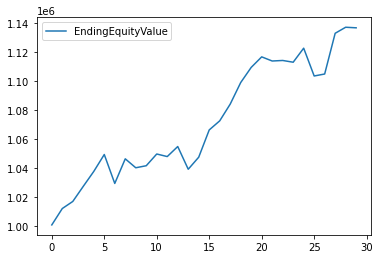

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
graph = pd.DataFrame()

for i in range (0,len(tradelist)):
    graph.loc[i,'EndingEquityValue'] = tradelist.loc[i,'Ending']

graph.plot()

In [105]:
Table1 = pd.DataFrame({'January':[]})

i = 0
while i < len(tradelist):
    for i in range (0,len(tradelist)):
        if tradelist.loc[i,'Month'] == '01':
            Table1.loc[i,'January'] = tradelist.loc[i,'NetP/L']
        i+=1   

Table1.reset_index(inplace = True,drop = True)
display(Table1)

,January
0,701.7992


In [106]:
Table2 = pd.DataFrame({'February':[]})

i = 0
while i < len(tradelist):
    for i in range (0,len(tradelist)):
        if tradelist.loc[i,'Month'] == '02':
            Table2.loc[i,'February'] = tradelist.loc[i,'NetP/L']
        i+=1   

Table2.reset_index(inplace = True,drop = True)
display(Table2)

,February
0,11317.078525
1,4881.586725
2,10447.525725


In [108]:
Table3 = pd.DataFrame({'March':[]})

i = 0
while i < len(tradelist):
    for i in range (0,len(tradelist)):
        if tradelist.loc[i,'Month'] == '03':
            Table3.loc[i,'March'] = tradelist.loc[i,'NetP/L']
        i+=1   

Table3.reset_index(inplace = True,drop = True)
display(Table3)

,March
0,10290.612125
1,11678.299275


In [109]:
Table4 = pd.DataFrame({'April':[]})

i = 0
while i < len(tradelist):
    for i in range (0,len(tradelist)):
        if tradelist.loc[i,'Month'] == '04':
            Table4.loc[i,'April'] = tradelist.loc[i,'NetP/L']
        i+=1   

Table4.reset_index(inplace = True,drop = True)
display(Table4)

,April
0,-19976.717275
1,16999.794450


In [110]:
Table5 = pd.DataFrame({'May':[]})

i = 0
while i < len(tradelist):
    for i in range (0,len(tradelist)):
        if tradelist.loc[i,'Month'] == '05':
            Table5.loc[i,'May'] = tradelist.loc[i,'NetP/L']
        i+=1   

Table5.reset_index(inplace = True,drop = True)
display(Table5)

,May
0,-6174.331800
1,1407.797325
2,8100.696000


In [111]:
Table6 = pd.DataFrame({'June':[]})

i = 0
while i < len(tradelist):
    for i in range (0,len(tradelist)):
        if tradelist.loc[i,'Month'] == '06':
            Table6.loc[i,'June'] = tradelist.loc[i,'NetP/L']
        i+=1   

Table6.reset_index(inplace = True,drop = True)
display(Table6)

,June
0,-1774.70470
1,6935.92265


In [112]:
Table7 = pd.DataFrame({'July':[]})

i = 0
while i < len(tradelist):
    for i in range (0,len(tradelist)):
        if tradelist.loc[i,'Month'] == '07':
            Table7.loc[i,'July'] = tradelist.loc[i,'NetP/L']
        i+=1   

Table7.reset_index(inplace = True,drop = True)
display(Table7)

,July
0,-15682.715525
1,8319.401475


In [113]:
Table8 = pd.DataFrame({'August':[]})

i = 0
while i < len(tradelist):
    for i in range (0,len(tradelist)):
        if tradelist.loc[i,'Month'] == '08':
            Table8.loc[i,'August'] = tradelist.loc[i,'NetP/L']
        i+=1   

Table8.reset_index(inplace = True,drop = True)
display(Table8)

,August
0,18819.250400
1,6276.363800
2,11559.411100
3,14893.486750
4,10458.210525


In [114]:
Table9 = pd.DataFrame({'September':[]})

i = 0
while i < len(tradelist):
    for i in range (0,len(tradelist)):
        if tradelist.loc[i,'Month'] == '09':
            Table9.loc[i,'September'] = tradelist.loc[i,'NetP/L']
        i+=1   

Table9.reset_index(inplace = True,drop = True)
display(Table9)

,September
0,7271.80910
1,-2860.87315


In [116]:
Table10 = pd.DataFrame({'October':[]})

i = 0
while i < len(tradelist):
    for i in range (0,len(tradelist)):
        if tradelist.loc[i,'Month'] == '10':
            Table10.loc[i,'October'] = tradelist.loc[i,'NetP/L']
        i+=1   

Table10.reset_index(inplace = True,drop = True)
display(Table10)

,October
0,371.252800
1,-1208.107525


In [117]:
Table11 = pd.DataFrame({'November':[]})

i = 0
while i < len(tradelist):
    for i in range (0,len(tradelist)):
        if tradelist.loc[i,'Month'] == '11':
            Table11.loc[i,'November'] = tradelist.loc[i,'NetP/L']
        i+=1   

Table11.reset_index(inplace = True,drop = True)
display(Table11)

,November
0,9700.142275
1,-19211.146950


In [118]:
Table12 = pd.DataFrame({'December':[]})

i = 0
while i < len(tradelist):
    for i in range (0,len(tradelist)):
        if tradelist.loc[i,'Month'] == '12':
            Table12.loc[i,'December'] = tradelist.loc[i,'NetP/L']
        i+=1   

Table12.reset_index(inplace = True,drop = True)
display(Table12)

,December
0,1375.054175
1,28116.159025
2,4171.753200
3,-394.212550


In [125]:
H0 = pd.DataFrame({'Number':['1','2','3','4','5','6']})
Output = H0.join([Table1,Table2,Table3,Table4,Table5,Table6,Table7,Table8,Table9,Table10,Table11,Table12])
display(Output)

ValueError: Indexes have overlapping values: Index(['March', 'October'], dtype='object')